## Convert the Gps images into a usable format

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
plt.imshow(img_array,cmap="gray")
plt.show()

NameError: ignored

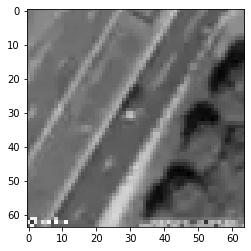

In [0]:
new_img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_img_array, cmap = 'gray')
plt.show()

## Create the training data

In [0]:
DATADIR = "images"
CATEGORIES=["safe","danger"]

training_data = []

IMG_SIZE = 64

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_arary = cv2.resize(img_array , (IMG_SIZE, IMG_SIZE))
            training_data.append([new_arary, class_num])
           
        
create_training_data()
    


In [0]:
print(len(training_data))

11090


In [0]:
import random

random.shuffle(training_data)

In [0]:
X = []
y = []

In [0]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
y = np.asarray(y)

## Save the training data for posterior use

In [0]:
import pickle

pickle_out = open("X.pickle" ,"wb")
pickle.dump(X, pickle_out)
pickle_out.close()


pickle_out = open("y.pickle" ,"wb")
pickle.dump(y, pickle_out)
pickle_out.close()



## Create the model

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten ,Conv2D, MaxPooling2D
from  keras.applications.vgg16 import VGG16
import pickle


X = pickle.load(open("drive/My Drive/Colab Notebooks/X.pickle","rb"))
y = pickle.load(open("drive/My Drive/Colab Notebooks/y.pickle","rb"))

X = X/255.0


In [0]:
def train_model(X,y):
    model = Sequential()
    model.add(Conv2D(64, (3,3), input_shape = X.shape[1:],activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))

    model.add(Conv2D(64,strides=2, kernel_size=(3,3),activation='relu'))
  
    model.add(Dropout(0.5))
  
    model.add(Conv2D(64,strides=2, kernel_size=(3,3),activation='relu'))

    model.add(Dropout(0.5))

    model.add(Conv2D(64,strides=2, kernel_size=(3,3),activation='relu'))

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dense(1))
    model.add(Activation("sigmoid"))

    model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'],weighted_metrics=['accuracy'])

    model.fit(X, y, batch_size=8,epochs = 20,validation_split=0.3)
    
    return model

In [0]:
def train_model_with_transfer_learning(X,y):
    model = Sequential()
    model.add(Conv2D(64, (3,3), input_shape = X.shape[1:],activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))

    model.add(Conv2D(64,strides=2, kernel_size=(3,3),activation='relu'))
  
    model.add(Dropout(0.5))
  
    model.add(Conv2D(64,strides=2, kernel_size=(3,3),activation='relu'))

    model.add(Dropout(0.5))

    model.add(Conv2D(64,strides=2, kernel_size=(3,3),activation='relu'))

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dense(1))
    model.add(Activation("sigmoid"))

    model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'],weighted_metrics=['accuracy'])

    model.fit(X, y, batch_size=8,epochs = 20,validation_split=0.3)
    
    return model

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
model = train_model(X_train,y_train)

Train on 5434 samples, validate on 2329 samples
Epoch 1/20
5434/5434 [==============================] - 22s 4ms/sample - loss: 0.6552 - acc: 0.6205 - weighted_acc: 0.6205 - val_loss: 0.5834 - val_acc: 0.7226 - val_weighted_acc: 0.7226
Epoch 2/20
5434/5434 [==============================] - 22s 4ms/sample - loss: 0.6011 - acc: 0.6910 - weighted_acc: 0.6910 - val_loss: 0.5700 - val_acc: 0.7256 - val_weighted_acc: 0.7256
Epoch 3/20
5434/5434 [==============================] - 21s 4ms/sample - loss: 0.5808 - acc: 0.7138 - weighted_acc: 0.7138 - val_loss: 0.5487 - val_acc: 0.7304 - val_weighted_acc: 0.7304
Epoch 4/20
5434/5434 [==============================] - 21s 4ms/sample - loss: 0.5804 - acc: 0.7120 - weighted_acc: 0.7120 - val_loss: 0.5553 - val_acc: 0.7097 - val_weighted_acc: 0.7097
Epoch 5/20
5434/5434 [==============================] - 21s 4ms/sample - loss: 0.5678 - acc: 0.7197 - weighted_acc: 0.7197 - val_loss: 0.5308 - val_acc: 0.7342 - val_weighted_acc: 0.7342
Epoch 6/20
5434/5

In [0]:
y_predict = model.predict(X_test)

In [0]:
y_predict = [int(x[0] >= 0.5) for x in y_predict]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_predict))

[[ 848  605]
 [ 272 1602]]


In [0]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66      1453
           1       0.73      0.85      0.79      1874

    accuracy                           0.74      3327
   macro avg       0.74      0.72      0.72      3327
weighted avg       0.74      0.74      0.73      3327



In [0]:
tf.VERSION

'1.14.0'

In [0]:
type(y)

list